In [38]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [39]:
# Function to find the gradient of a given
# multivariable function
def grad(func, xvec, xlen):
    
    # Point at which to find gradient.
    xvec = xvec.astype('float64')
    # Array storing gradient.
    gradvec = np.zeros(xlen)
    # h-value used for numeric differentiation.
    h = 1e-5
    
    # Filling up gradient vector.
    for j in range(xlen):
        
        # Storing the x-h and x+h vectors for gradient calculation.
        xbac = xvec.copy()
        xbac[j] -= h
        xfor = xvec.copy()
        xfor[j] += h
        # Appropriate component of the gradient.
        gradvec[j] = (func(xfor)-func(xbac))/(2*h)

    return gradvec
    
def jacobian(funcvec, xvec):
    
    # Vector of functions.
    # Length of function and indep. variable vector.
    flen = np.shape(funcvec)[0]
    xlen = np.shape(xvec)[0]
    # Creating Jacobian matrix.
    jacmatrix = np.zeros([flen, xlen])
    
    # Filling up Jacobian matrix row by row.
    for i in range(flen):
        jacmatrix[i, :] = grad(funcvec[i], xvec, xlen)
        
    
    return jacmatrix

In [43]:
def newtons(funcvec, x0, tol=1e-10, nmax=100, convarray=False):
    # Vector of functions and variables,
    # as column vectors.
    funcvec = np.array(funcvec).T
    x0 = np.array(x0).T
    # Initializing to random sequence.
    xk = np.random.rand(len(x0))
    
    # Initial LHS and RHS tolerance calculation
    # values.
    reslhs = np.linalg.norm(xk-x0)
    resrhs = tol*(1+np.linalg.norm(xk))
    
    niter = 0
    bflag = 0
    
    # List of values to return if convarray is True
    xvals = []
    while reslhs > resrhs:
        
        if convarray:
            xvals.append(x0)
            
        if niter > nmax:
            bflag = 1
            print("Max number of iterations reached. No convergence.")
            break
        
        
        niter += 1
        
        # This part of the algorithm implements a generalized
        # Newton's method for systems as described in Uri p254.
        # The variable naming convention is also according
        # to the described notation in the book.
        
        #f(k): vector of function values
        funcvals_xk = np.array([func(x0) for func in funcvec])
        
        # Jacobian of functions at current point.
        jacmatrix = jacobian(funcvec, x0)
        
        # The direction vector, as shown in Uri p253/254
        pk = np.linalg.solve(jacmatrix, -funcvals_xk)
        
        # Calculating LHS and RHS for stopping criterium.
        reslhs = np.linalg.norm(pk)
        resrhs = tol*(1+np.linalg.norm(xk))
        
        print(xk)
        xk = x0 + pk
        resrhs = tol*(1+np.linalg.norm(xk))
        x0 = xk
    # If asking for convergence, returns final xvec
    # as well as convergence progress.
    if convarray:
        return x0, np.array(xvals)
    
    return x0
    
    
    


funcs = [lambda x: x[0] + x[1] - 2*x[0]*x[1],
         lambda x: x[0]**2 + x[1]**2 - 2*(x[0]-x[1])+1]

# Solves the system of equations
# Returns convergence trend and final solution vector
x, conv = newtons(funcs, [0.1, -0.5], convarray=True)

[ 0.22653077  0.92959937]
[ 0.20116279 -0.37790698]
[ 0.21573875 -0.37939629]
[ 0.21576091 -0.37954124]
[ 0.21576092 -0.37954125]


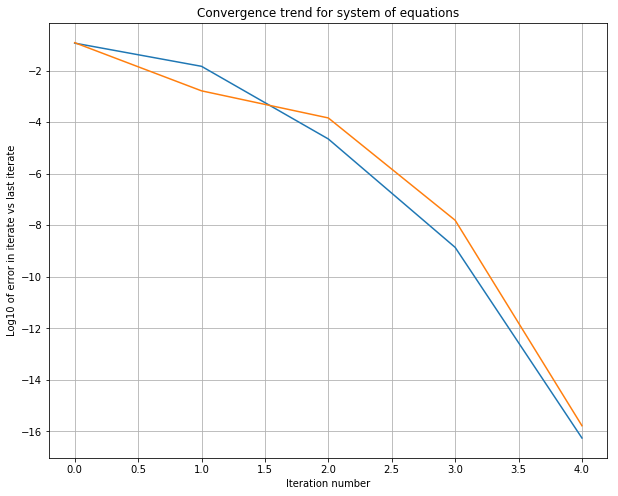

In [42]:
# Showing quadratic convergence of the
# method.
convergence_trend = np.log10(np.abs(conv-x))
plt.plot(convergence_trend)
plt.grid()
plt.title("Convergence trend for system of equations")
plt.xlabel("Iteration number")
plt.ylabel("Log10 of error in iterate vs last iterate")